<a href="https://colab.research.google.com/github/jacklmg75/data-extraction/blob/main/1_1_Minera%C3%A7%C3%A3o_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração de Texto

In [ ]:
%%capture

import nltk   # Livro http://www.nltk.org/book
import pandas as pd  # https://www.dataschool.io/best-python-pandas-resources/


# tokenizar / quebrar em termos /  bag of words
from nltk.tokenize import word_tokenize
nltk.download('punkt') # faz o download do "tokenizador" que será usado em word_tokenize

In [ ]:
# Lê arquivo em csv através de uma URL
url = 'https://www.dropbox.com/s/edwi9gwkc1me22v/restaurantes.csv?dl=1'  # Arquivo tweets em csv salvo no dropbox. O parametro dl=1 força o download direto (sem preview)
df = pd.read_csv(url)

In [ ]:
# preview do dataframe lido
df.head(2)  # você pode definir o número de linhas

,user name,review title,review text,stars,Reviews,Restaurant,Category
0,1travellerBrussels,"Great food, interesting service",\nthis restaurant is seemingly known by Berlin...,5.0,29.0,Saigon and more,Asian
1,coverdriven,Excellent Lunch Destination,\nVery much enjoyed our experience here. Food ...,4.0,2.0,Saigon and more,Asian


# POS Tagging (Part of Speech Tagging)

In [ ]:
documents_text = df['review text']  # recebemos o texto
doc_text = documents_text[0] #Selecionando apenas a 1a linha (posição 0)
print(doc_text)


this restaurant is seemingly known by Berliners for its good Vietnamese food and fair pricing. I enjoyed the food and I have asked the owner to chose for me. Expect to be warmly welcomed by the owner in a rather unique way. the interior is basic, but pleasant.



In [ ]:
# averaged_perceptron_tagger: Um modelo de [Part-of-Speech (POS]] para lingua inglesa
# será utilizado pela nltk na função pos_tag (nltk.pos_tag)
%%capture
nltk.download('averaged_perceptron_tagger')

In [ ]:
tokens = word_tokenize(doc_text)

tagged_tokens = nltk.pos_tag(tokens)

print(tagged_tokens)

[('this', 'DT'), ('restaurant', 'NN'), ('is', 'VBZ'), ('seemingly', 'RB'), ('known', 'VBN'), ('by', 'IN'), ('Berliners', 'NNS'), ('for', 'IN'), ('its', 'PRP$'), ('good', 'JJ'), ('Vietnamese', 'JJ'), ('food', 'NN'), ('and', 'CC'), ('fair', 'JJ'), ('pricing', 'NN'), ('.', '.'), ('I', 'PRP'), ('enjoyed', 'VBD'), ('the', 'DT'), ('food', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('have', 'VBP'), ('asked', 'VBN'), ('the', 'DT'), ('owner', 'NN'), ('to', 'TO'), ('chose', 'VB'), ('for', 'IN'), ('me', 'PRP'), ('.', '.'), ('Expect', 'VB'), ('to', 'TO'), ('be', 'VB'), ('warmly', 'RB'), ('welcomed', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('owner', 'NN'), ('in', 'IN'), ('a', 'DT'), ('rather', 'RB'), ('unique', 'JJ'), ('way', 'NN'), ('.', '.'), ('the', 'DT'), ('interior', 'NN'), ('is', 'VBZ'), ('basic', 'JJ'), (',', ','), ('but', 'CC'), ('pleasant', 'NN'), ('.', '.')]


In [ ]:
# maxent_ne_chunker: Um classificador (conhecido como MaxEnt) utilizado para detecção de entidades.
# será utilizado pela nltk na função ne_chunk (ntlk.ne_chunk)
# words: é um corpus de palavras também usado como dependência para executar o ne_chunk. Mais sobre corpus: # http://www.nltk.org/book/ch02.html
%%capture
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Deteção de Entidades

<img src="https://www.dropbox.com/s/90wm5s8x6cng5so/chunk-segmentation.png?dl=1" alt="Drawing" width="500"/>


In [ ]:
entities = nltk.ne_chunk(tagged_tokens)
print(entities)

(S
  this/DT
  restaurant/NN
  is/VBZ
  seemingly/RB
  known/VBN
  by/IN
  (ORGANIZATION Berliners/NNS)
  for/IN
  its/PRP$
  good/JJ
  Vietnamese/JJ
  food/NN
  and/CC
  fair/JJ
  pricing/NN
  ./.
  I/PRP
  enjoyed/VBD
  the/DT
  food/NN
  and/CC
  I/PRP
  have/VBP
  asked/VBN
  the/DT
  owner/NN
  to/TO
  chose/VB
  for/IN
  me/PRP
  ./.
  Expect/VB
  to/TO
  be/VB
  warmly/RB
  welcomed/VBN
  by/IN
  the/DT
  owner/NN
  in/IN
  a/DT
  rather/RB
  unique/JJ
  way/NN
  ./.
  the/DT
  interior/NN
  is/VBZ
  basic/JJ
  ,/,
  but/CC
  pleasant/NN
  ./.)


In [ ]:
phrase = "Who is the best teacher of Puc Minas ? Of course it is Cristiano Carvalho"

tokens = word_tokenize(phrase)
tagged_tokens = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged_tokens)
print(entities)

(S
  Who/WP
  is/VBZ
  the/DT
  best/JJS
  teacher/NN
  of/IN
  (ORGANIZATION Puc/NNP Minas/NNP)
  ?/.
  Of/IN
  course/NN
  it/PRP
  is/VBZ
  (PERSON Cristiano/NNP Carvalho/NNP))


## Dicionários próprios

In [ ]:
# Tokens de exemplo

print(doc_text)
tokens = word_tokenize(doc_text)
print(tokens)


this restaurant is seemingly known by Berliners for its good Vietnamese food and fair pricing. I enjoyed the food and I have asked the owner to chose for me. Expect to be warmly welcomed by the owner in a rather unique way. the interior is basic, but pleasant.

['this', 'restaurant', 'is', 'seemingly', 'known', 'by', 'Berliners', 'for', 'its', 'good', 'Vietnamese', 'food', 'and', 'fair', 'pricing', '.', 'I', 'enjoyed', 'the', 'food', 'and', 'I', 'have', 'asked', 'the', 'owner', 'to', 'chose', 'for', 'me', '.', 'Expect', 'to', 'be', 'warmly', 'welcomed', 'by', 'the', 'owner', 'in', 'a', 'rather', 'unique', 'way', '.', 'the', 'interior', 'is', 'basic', ',', 'but', 'pleasant', '.']


In [ ]:
# Nós podemos treinar nosso próprio POS "Tagger" utilizando o UnigramTagger e um dicionário de tags como parâmetro

from nltk.tag.sequential import UnigramTagger

#                   [[(TERMO, TAG), (TERMO, TAG)...]]

dummy_dictionary = [[('Berliners', 'PEOPLE'), ('pleasant', 'JJ')]]
dummy_dict_tagger = UnigramTagger(dummy_dictionary)

In [ ]:
dummy_dict_tagger.tag(tokens)

[('this', None),
 ('restaurant', None),
 ('is', None),
 ('seemingly', None),
 ('known', None),
 ('by', None),
 ('Berliners', 'PEOPLE'),
 ('for', None),
 ('its', None),
 ('good', None),
 ('Vietnamese', None),
 ('food', None),
 ('and', None),
 ('fair', None),
 ('pricing', None),
 ('.', None),
 ('I', None),
 ('enjoyed', None),
 ('the', None),
 ('food', None),
 ('and', None),
 ('I', None),
 ('have', None),
 ('asked', None),
 ('the', None),
 ('owner', None),
 ('to', None),
 ('chose', None),
 ('for', None),
 ('me', None),
 ('.', None),
 ('Expect', None),
 ('to', None),
 ('be', None),
 ('warmly', None),
 ('welcomed', None),
 ('by', None),
 ('the', None),
 ('owner', None),
 ('in', None),
 ('a', None),
 ('rather', None),
 ('unique', None),
 ('way', None),
 ('.', None),
 ('the', None),
 ('interior', None),
 ('is', None),
 ('basic', None),
 (',', None),
 ('but', None),
 ('pleasant', 'JJ'),
 ('.', None)]

# Sentimento

In [ ]:
# Leitura de termos positivos

dict_positives = pd.read_csv("https://www.dropbox.com/s/srvm7wxi4ybbjif/corpus-traduzido-positivo.csv?dl=1",header=None)
dict_positives.head()

,0,1
0,abidance,abidance
1,abidance,abidance
2,abide,respeitar
3,abilities,habilidades
4,ability,capacidade


In [ ]:
# Leitura de termos negativos

dict_negatives = pd.read_csv("https://www.dropbox.com/s/4cdsao9g87u2eio/corpus-traduzido-negativo.csv?dl=1",header=None)
dict_negatives.head()

,0,1
0,abandoned,abandonado
1,abandonment,abandono
2,abandon,abandonar
3,abase,abase
4,abasement,humilhação


In [ ]:
# [(TERMO, TAG), (TERMO, TAG)...]

positive_tags = [(word, "POSITIVE") for word in dict_positives[0]]

print(len(positive_tags))

positive_tags[:5]

2718


[('abidance', 'POSITIVE'),
 ('abidance', 'POSITIVE'),
 ('abide', 'POSITIVE'),
 ('abilities', 'POSITIVE'),
 ('ability', 'POSITIVE')]

In [ ]:
negative_tags = [(word, "NEGATIVE") for word in dict_negatives[0]]

print(len(negative_tags))

negative_tags[:5]

4902


[('abandoned', 'NEGATIVE'),
 ('abandonment', 'NEGATIVE'),
 ('abandon', 'NEGATIVE'),
 ('abase', 'NEGATIVE'),
 ('abasement', 'NEGATIVE')]

In [ ]:
sentiment_dictionary = positive_tags + negative_tags

print(len(sentiment_dictionary))

sentiment_dictionary[:5]

7620


[('abidance', 'POSITIVE'),
 ('abidance', 'POSITIVE'),
 ('abide', 'POSITIVE'),
 ('abilities', 'POSITIVE'),
 ('ability', 'POSITIVE')]

In [ ]:
my_dict_tagger = UnigramTagger([sentiment_dictionary])
my_dict_tagger.tag(tokens)

[('this', None),
 ('restaurant', None),
 ('is', None),
 ('seemingly', None),
 ('known', None),
 ('by', None),
 ('Berliners', None),
 ('for', None),
 ('its', None),
 ('good', 'POSITIVE'),
 ('Vietnamese', None),
 ('food', None),
 ('and', None),
 ('fair', 'POSITIVE'),
 ('pricing', None),
 ('.', None),
 ('I', None),
 ('enjoyed', None),
 ('the', None),
 ('food', None),
 ('and', None),
 ('I', None),
 ('have', None),
 ('asked', None),
 ('the', None),
 ('owner', None),
 ('to', None),
 ('chose', None),
 ('for', None),
 ('me', None),
 ('.', None),
 ('Expect', None),
 ('to', None),
 ('be', None),
 ('warmly', 'POSITIVE'),
 ('welcomed', None),
 ('by', None),
 ('the', None),
 ('owner', None),
 ('in', None),
 ('a', None),
 ('rather', None),
 ('unique', 'POSITIVE'),
 ('way', None),
 ('.', None),
 ('the', None),
 ('interior', None),
 ('is', None),
 ('basic', 'POSITIVE'),
 (',', None),
 ('but', None),
 ('pleasant', 'POSITIVE'),
 ('.', None)]

#Múltiplos Taggers

In [ ]:
nltk.download('brown') # varios outros corpus (inclusive floresta/mac_morpho em portugues) : http://www.nltk.org/nltk_data/

from nltk.corpus import brown

tagged_sents = brown.tagged_sents()
tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [ ]:
# Tagger completo

t1 = UnigramTagger(tagged_sents) # corpora
t2 = UnigramTagger([dummy_dictionary], backoff=t1) # dicionario manual
full_tagger = UnigramTagger([sentiment_dictionary], backoff=t2) # dicionario de sentimentos lido em csv

In [ ]:
tokens_with_tags = full_tagger.tag(tokens)
tokens_with_tags

[('this', 'DT'),
 ('restaurant', 'NN'),
 ('is', 'BEZ'),
 ('seemingly', 'RB'),
 ('known', 'VBN'),
 ('by', 'IN'),
 ('Berliners', 'NPS-TL'),
 ('for', 'IN'),
 ('its', 'PP$'),
 ('good', 'POSITIVE'),
 ('Vietnamese', 'NPS'),
 ('food', 'NN'),
 ('and', 'CC'),
 ('fair', 'POSITIVE'),
 ('pricing', 'VBG'),
 ('.', '.'),
 ('I', 'PPSS'),
 ('enjoyed', 'VBD'),
 ('the', 'AT'),
 ('food', 'NN'),
 ('and', 'CC'),
 ('I', 'PPSS'),
 ('have', 'HV'),
 ('asked', 'VBD'),
 ('the', 'AT'),
 ('owner', 'NN'),
 ('to', 'TO'),
 ('chose', 'VBD'),
 ('for', 'IN'),
 ('me', 'PPO'),
 ('.', '.'),
 ('Expect', 'VB'),
 ('to', 'TO'),
 ('be', 'BE'),
 ('warmly', 'POSITIVE'),
 ('welcomed', 'VBN'),
 ('by', 'IN'),
 ('the', 'AT'),
 ('owner', 'NN'),
 ('in', 'IN'),
 ('a', 'AT'),
 ('rather', 'RB'),
 ('unique', 'POSITIVE'),
 ('way', 'NN'),
 ('.', '.'),
 ('the', 'AT'),
 ('interior', 'JJ'),
 ('is', 'BEZ'),
 ('basic', 'POSITIVE'),
 (',', ','),
 ('but', 'CC'),
 ('pleasant', 'POSITIVE'),
 ('.', '.')]

# Visualização

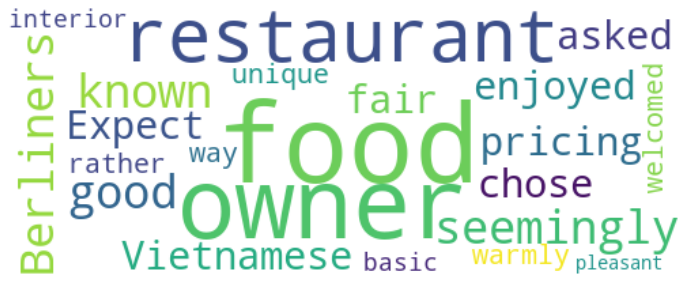

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_conf = WordCloud(width=500,
                      max_font_size=80,
                      max_words=50,
                      background_color="white")

tagcloud = wordcloud_conf.generate(' '.join(tokens))

plt.figure(figsize=(15,5))
plt.imshow(tagcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
color_by_tag = {pair[0]:"green" for pair in tokens_with_tags if pair[1]=="POSITIVE"}
color_by_tag.update({pair[0]:"red" for pair in tokens_with_tags if pair[1]=="NEGATIVE"})

color_by_tag

{'basic': 'green',
 'fair': 'green',
 'good': 'green',
 'pleasant': 'green',
 'unique': 'green',
 'warmly': 'green'}

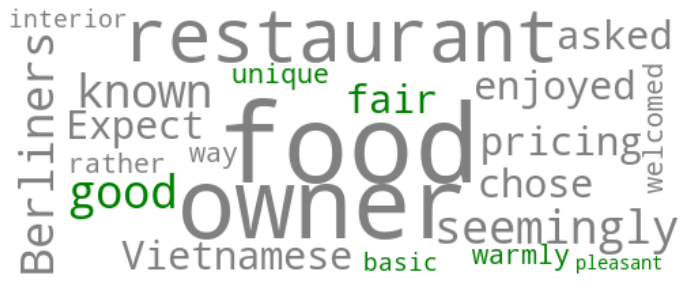

In [ ]:
# Recebe uma palavra, procura no dicionario que criamos e retorna a cor associada.
# se não encontrar, retorna cinza

def word_to_color(word,**kwargs):
  return color_by_tag.get(word,"gray")

tagcloud.recolor(color_func=word_to_color)  # Applying a new coloring is much faster than generating the whole wordcloud :https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

plt.figure(figsize=(15,5))
plt.imshow(tagcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Nuvem de palavras de Sentimento

In [ ]:
# Tokenizamos os documentos

all_docs_tokens = df['review text'].apply(word_tokenize) # aplica o simple tokenizer em todos documentos; bag of words
all_docs_tokens.head()

0    [this, restaurant, is, seemingly, known, by, B...
1    [Very, much, enjoyed, our, experience, here, ....
2    [We, found, this, little, gem, through, the, t...
3    [Food, was, top, class, and, very, cheap, ., W...
4    [I, went, there, because, it, was, nearby, my,...
Name: review text, dtype: object

In [ ]:
# Criamos as tags para os termos de cada documento

tagged_doc_tokens = all_docs_tokens.apply(full_tagger.tag)
tagged_doc_tokens[:5]

0    [(this, DT), (restaurant, NN), (is, BEZ), (see...
1    [(Very, QL), (much, AP), (enjoyed, VBD), (our,...
2    [(We, PPSS), (found, VBD), (this, DT), (little...
3    [(Food, NN-TL), (was, BEDZ), (top, POSITIVE), ...
4    [(I, PPSS), (went, VBD), (there, EX), (because...
Name: review text, dtype: object

In [ ]:
# print([pair for doc_tokens in tagged_doc_tokens for pair in doc_tokens][:100])

In [ ]:
def extract_pairs(tagged_doc_tokens):
  return [pair for doc_tokens in tagged_doc_tokens for pair in doc_tokens]

In [ ]:
pairs = extract_pairs(tagged_doc_tokens)

sentiment_tokens = [pair for pair in pairs if (pair[1]=="NEGATIVE" or pair[1]=="POSITIVE")]
sentiment_tokens[:5]

[('good', 'POSITIVE'),
 ('fair', 'POSITIVE'),
 ('warmly', 'POSITIVE'),
 ('unique', 'POSITIVE'),
 ('basic', 'POSITIVE')]

In [ ]:
color_by_tag = {pair[0]:"red" for pair in sentiment_tokens if pair[1]=="NEGATIVE"}
color_by_tag.update({pair[0]:"green" for pair in sentiment_tokens if pair[1]=="POSITIVE"})

color_by_tag.get("good"),color_by_tag.get("bad")

('green', 'red')

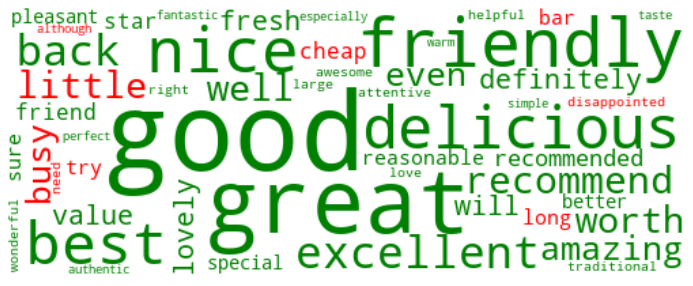

In [ ]:
tagcloud = wordcloud_conf.generate(' '.join([pair[0] for pair in pairs if (pair[1]=="NEGATIVE" or pair[1]=="POSITIVE")]))

tagcloud = tagcloud.recolor(color_func=word_to_color)

plt.figure(figsize=(15,5))
plt.imshow(tagcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Faça você mesmo:

Crie uma nuvem de palavras com a **ADJETIVOS** e **VERBOS**

**Dica**:

- **JJ** são adjetivos
- **VBN** são verbos

> Para consultar outras siglas e seus significados: https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html

**Extra**: Aproveite também para testar outras cores na nuvem de palavras

In [ ]:
# ATENÇÃO: Para executar seu código apagar a linha abaixo %%script false --no-raise-error

%%script false --no-raise-error

adj_and_v_tokens = ''' SEU CÓDIGO AQUI '''
adj_and_v_tokens[:5]

In [ ]:
# ATENÇÃO: Para executar seu código apagar a linha abaixo %%script false --no-raise-error

%%script false --no-raise-error

color_by_tag = ''' SEU CODIGO AQUI '''

color_by_tag.get("tasty"), color_by_tag.get("made")

In [ ]:
# ATENÇÃO: Para executar seu código apagar a linha abaixo %%script false --no-raise-error

%%script false --no-raise-error

tagcloud = wordcloud_conf.generate('''SEU CÓDIGO AQUI''')

tagcloud.recolor(color_func=word_to_color)

plt.figure(figsize=(15,5))
plt.imshow(tagcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Gabarito

In [ ]:
adj_and_v_tokens = [pair for pair in pairs if (pair[1] in ["JJ", 'JJR', 'JJS'] or pair[1]=="VBN")]
adj_and_v_tokens[:5]

[('known', 'VBN'),
 ('welcomed', 'VBN'),
 ('interior', 'JJ'),
 ('presented', 'VBN'),
 ('earlier', 'JJR')]

In [ ]:
color_by_tag = {pair[0]:"blue" for pair in adj_and_v_tokens if pair[1]=="JJ"}
color_by_tag.update({pair[0]:"orange" for pair in adj_and_v_tokens if pair[1]=="VBN"})

color_by_tag.get("tasty"), color_by_tag.get("made")

('blue', 'orange')

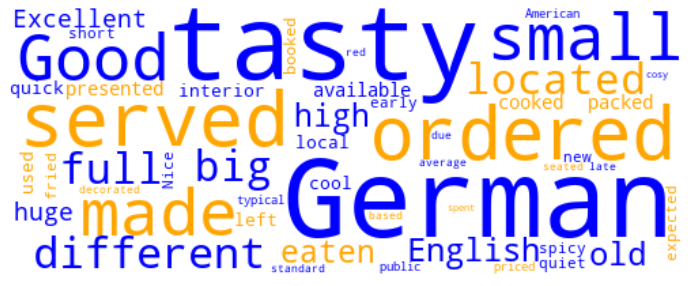

In [ ]:
tagcloud = wordcloud_conf.generate(' '.join([pair[0] for pair in pairs if (pair[1]=="JJ" or pair[1]=="VBN")]))

tagcloud.recolor(color_func=word_to_color)

plt.figure(figsize=(15,5))
plt.imshow(tagcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Acabou